# Import libraries

In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
from custommodels import KNNclassifier, GaussNB, Gauss
from usefulfunctions import MinMaxScaler, MinMaxScaler2, accuracy

# Prepare Data
## Import

In [110]:
data=pd.read_csv('MNIST_train.csv')

## Explore

In [111]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [112]:
data.head()

,index,labels,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 786 entries, index to 783
dtypes: int64(786)
memory usage: 359.8 MB


In [114]:
# Change data frame to arrays
x=data.to_numpy()
x.shape

(60000, 786)

# EDA images

In [115]:
# reshape to make it possible for image
X=x[:,2:]
y=x[:,1]
X.shape

(60000, 784)

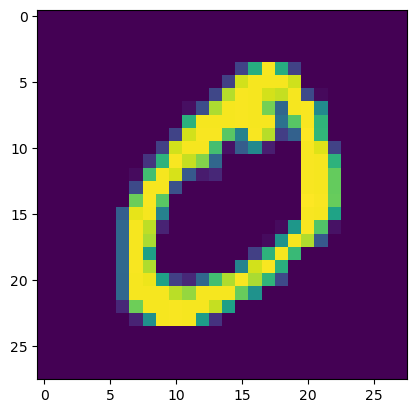

In [116]:
plt.imshow(X[1].reshape(28,28), interpolation='nearest')
plt.show;

In [117]:
# create a function for producing images
def show_me(X):
    return plt.imshow(X.reshape(28,28))
    
def show_me_allmean(X,y,k):
    show_me(sum(X[y==k,:]/len(X[y==k,:])))

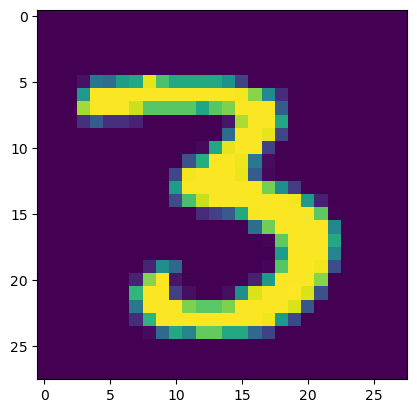

In [118]:
show_me(X[12])

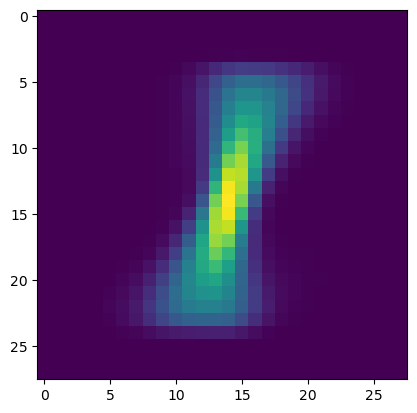

In [119]:
# plot the mean for a particular number. 1 in this case
show_me_allmean(X, y, 1)

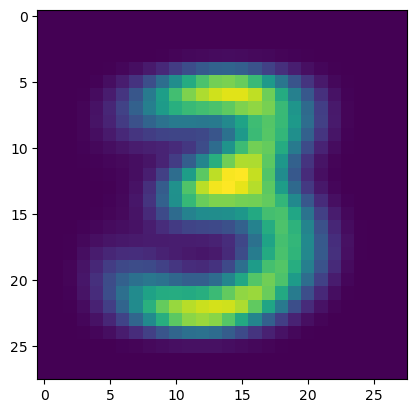

In [120]:
# plot the mean for a particular number. 3 in this case
show_me_allmean(X, y, 3)

## Split Data
- this data does not need splitting since we already have test data provided

In [121]:
# slice the features
X_train=x[:,2:]
y_train=x[:,1]  # labels
print(f'features are {X_train.shape}, and targets are {y_train.shape}')

features are (60000, 784), and targets are (60000,)


In [122]:
# Import test data
test_data=pd.read_csv('MNIST_test.csv')

In [123]:
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [124]:
X_T=test_data.to_numpy()
X_=X_T[:,2:]
y_ = X_T[:,1]

print(X_.shape)
y_.shape


(10000, 784)


(10000,)

In [125]:
# Split into validation and testing

X_val, X_test, y_val, y_test= train_test_split(
    X_, y_, test_size=0.5, random_state=42

)

In [126]:
print(X_val.shape, X_test.shape)

(5000, 784) (5000, 784)


# Build Model

## Baseline

In [127]:
acc_baseline=data['labels'].value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.11


In [128]:
# class MinMaxScaler1():
    
#     # def  __init__(self, num, deno):
#     #     self.num= num
#     #     self.deno= deno
    
#     def fit(self, X):
#         num=X-X.min()
#         deno=X.max()-X.min()
        
#         #return self.num, self.deno
             
        
        
        
#     def transform(self):
        
#         result=self.num/deno
        
        
#         return  result

# Iterate

In [129]:
# Scale the data
X_scaled=MinMaxScaler2(X_train)


In [135]:
# Build Models
model1 = GaussNB()
model2 = Gauss()
model3 = KNeighborsClassifier()

### GaussNB

In [144]:
# tune parameters
score={}
epsilon=[1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
for epsilon in epsilon:
    model1.fit(X_scaled, y_train, epsilon=epsilon)
    y_hat=model1.predict(X_scaled)
    score[round(epsilon, 2)]=round(accuracy(y_hat, y_train),2)
score

{0.0: 0.77, 0.01: 0.8, 0.1: 0.77, 1: 0.66, 10: 0.6}

--best value for epsilon was 1e-2 which got 80% accuracy


In [145]:
# train the best model
model1.fit(X_scaled, y_train, epsilon=1e-2)
y_hat=model1.predict(X_scaled)

In [146]:
accuracy(y_hat,y_train)

0.8015833333333333

### Gauss

In [35]:
parameters_score={}
epsilon=[1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
for epsilon in epsilon:
    Model2.fit(X_scaled, y_train, epsilon=epsilon)
    y_hat=Model2.predict(X_scaled)
    parameters_score[round(epsilon,2)]=round(accuracy(y_hat, y_train),2)
parameters_score

{0.0: 0.93, 0.01: 0.96, 0.1: 0.95, 1: 0.88, 10: 0.68}

--best value for epsilon was 1e-2 which got 96% accuracy

In [36]:
Model2.fit(X_scaled, y_train, epsilon=1e-2)
y_hat=Model2.predict(X_scaled)
accuracy(y_hat,y_train)


0.9555333333333333

### KNN Classifier

In [58]:
Model3.fit(X_scaled, y_train) # KNN Classifier from sklearn

KNeighborsClassifier()

In [59]:
y_hat=Model3.predict(X_scaled)

C:\Users\Walee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [62]:
accuracy(y_hat,y_train)

0.9819166666666667

# Evaluate

## Validation

In [40]:
X_val_scaled=MinMaxScaler2(X_val)
y_hat_val=Model1.predict(X_val_scaled)
accuracy=accuracy(y_hat_val, y_val)
print('Validation Accuracy GaussNB', round(accuracy, 2))

Validation Accuracy GaussNB 0.82


In [44]:
y_hat_val=Model2.predict(X_val)
accuracy=accuracy(y_hat_val, y_val)
print('Validation Accuracy for Gauss', round(accuracy, 2))

Validation Accuracy for Gauss 0.91


## with test data

In [63]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [53]:
X_test_scaled=MinMaxScaler2(X_test)
y_hat_val=Model1.predict(X_test_scaled)
accuracy=accuracy(y_hat_val, y_test)
print('Test Accuracy GaussNB', round(accuracy, 2))

Test Accuracy GaussNB 0.81


In [56]:
X_test_scaled=MinMaxScaler2(X_test)
y_hat_val=Model2.predict(X_test_scaled)
accuracy=accuracy(y_hat_val, y_test)
print('Test Accuracy Gauss', round(accuracy, 2))

Test Accuracy Gauss 0.95


In [64]:
X_test_scaled=MinMaxScaler2(X_test)
y_hat_val=Model3.predict(X_test_scaled)
accuracy=accuracy(y_hat_val, y_test)
print('Test Accuracy KNN Sklearn', round(accuracy, 2))

C:\Users\Walee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test Accuracy KNN Sklearn 0.97


In [65]:
accuracy(y_hat, y_train)

TypeError: 'numpy.float64' object is not callable